# Individual PMFs

### Visual Data

Individual PMF fits only. see pmf_rdk_groupwise.ipynb for the average group-wise PMF. 

In [14]:
# import relevant modules
import os, sys, glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as s
import warnings
import pingouin as pg

# import specific functions/ classes
from scipy.stats import logistic
from scipy.optimize import minimize
from scipy.stats import pearsonr, spearmanr, kendalltau 
from scipy.stats import ttest_rel

# print settings for easier df inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

# suppress a ton of Jupyter related warnings
warnings. filterwarnings("ignore")

In [2]:
# read datafile
os.chdir('C:\\Users\\annae\\Dropbox\\PhD\\RDK\\all_data')
df = pd.read_csv('1_pmf_clean_history_pps.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
subjects = list(df['sbj_id'].unique())
print('Number of included participants: ',len(subjects))
df.head()

Number of included participants:  42


,Trial,Block,block_type,coherence,target,response,correct,cueValid,response_key,onset_rdk,end_rdk,onset_tone,onset_responseWin,rt,key_press,sbj_id,resp_1,resp_2,resp_3,resp_4,resp_5,resp_6,resp_7,stim_1,stim_2,stim_3,stim_4,stim_5,stim_6,stim_7,caps,pdi,cue,pdi_zscore,caps_zscore,PPS,block_type_z,coherence_z,target_z,response_z,correct_z,cueValid_z,response_key_z,rt_z,resp_1_z,resp_2_z,resp_3_z,resp_4_z,resp_5_z,resp_6_z,resp_7_z,stim_1_z,stim_2_z,stim_3_z,stim_4_z,stim_5_z,stim_6_z,stim_7_z,caps_z,pdi_z,cue_z,pdi_zscore_z,caps_zscore_z,PPS_z
0,8,1,1,0.3,1,1,1,0,1,1.629811e+09,1.629811e+09,1.629811e+09,1.629811e+09,1.93430,1.629811e+09,ANE14H,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,-1.054285,-0.579913,-1.634198,1.0,-0.29277,1.0,0.97768,0.007361,-1.732051,0.049355,-0.086730,0.977509,-1.023581,0.977343,-1.024232,-1.024435,-1.023490,-1.022730,1.000564,1.000507,1.000512,1.000777,1.000523,-1.000265,-1.0,-0.579913,-1.054285,-1.001489,-1.054285,-0.579913,-0.855006
1,9,1,1,0.1,1,0,0,1,0,1.629811e+09,1.629811e+09,1.629811e+09,1.629811e+09,1.89877,1.629811e+09,ANE14H,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,-1.054285,-0.579913,-1.634198,1.0,-1.46385,1.0,-1.02283,-0.193853,0.577350,-0.151249,-0.094000,0.977509,0.976962,-1.023182,0.976341,-1.024435,-1.023490,-1.022730,1.000564,1.000507,1.000512,1.000777,1.000523,0.999735,-1.0,-0.579913,-1.054285,0.998513,-1.054285,-0.579913,-0.855006
2,10,1,1,0.6,1,1,1,0,0,1.629811e+09,1.629811e+09,1.629811e+09,1.629811e+09,2.17065,1.629811e+09,ANE14H,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,-1.054285,-0.579913,-1.634198,1.0,1.46385,1.0,0.97768,0.007361,-1.732051,-0.151249,-0.038373,-1.023009,0.976962,0.977343,-1.024232,0.976148,-1.023490,-1.022730,1.000564,1.000507,1.000512,1.000777,1.000523,0.999735,1.0,-0.579913,-1.054285,-1.001489,-1.054285,-0.579913,-0.855006
3,11,1,1,-0.1,0,0,1,1,1,1.629811e+09,1.629811e+09,1.629811e+09,1.629811e+09,2.06285,1.629811e+09,ANE14H,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,-1.054285,-0.579913,-1.634198,1.0,-1.46385,-1.0,-1.02283,0.007361,0.577350,0.049355,-0.060429,0.977509,-1.023581,0.977343,0.976341,-1.024435,0.977049,-1.022730,1.000564,1.000507,1.000512,1.000777,1.000523,0.999735,1.0,-0.579913,-1.054285,-1.001489,-1.054285,-0.579913,-0.855006
4,12,1,1,0.3,1,0,0,1,0,1.629811e+09,1.629811e+09,1.629811e+09,1.629811e+09,2.03139,1.629811e+09,ANE14H,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.054285,-0.579913,-1.634198,1.0,-0.29277,1.0,-1.02283,-0.193853,0.577350,-0.151249,-0.066866,-1.023009,0.976962,-1.023182,0.976341,0.976148,-1.023490,0.977775,-0.999436,1.000507,1.000512,1.000777,1.000523,0.999735,1.0,-0.579913,-1.054285,0.998513,-1.054285,-0.579913,-0.855006


In [3]:
# make coding of block type = auditory data 
# 0 = repetitive, 1= neutral
for index, row in df.iterrows(): 
    if row['block_type'] == 1: 
        block_type = 0
    elif row['block_type'] == 0: 
        block_type = 1
        
    df.at[index, 'block_type'] = block_type

In [4]:
def fit_PMF(df): 
    
    choices = df.loc[:,'response'].values
    stimuli = df.loc[:,'coherence'].values
    
    def minfun(params): 
        noise,bias = params
        cp= 1 / (1 + np.exp(-(stimuli - bias) / noise))
        model_p = cp * (choices==1) + (1-cp) * (choices==0)
        return -np.sum(np.log(np.maximum(1e-2,model_p)))
    
    noise,bias = minimize(minfun,[1,1],bounds=[(1e-2,0.4),(-10,10)]).x
    
    return bias, noise


def plot_PMF(bias_l, noise_l, bias_r, noise_r, ax, sbj_id, choices_l, stimuli_l, choices_r, stimuli_r):

    x = np.arange(-1,1,0.1)
    
    # logistic func
    logis = lambda x, beta, bias: 1/(1+np.exp(-(x-bias)/beta))
    
    # prev_left
    ax.plot(x, logis(x, noise_l, bias_l), label='prev_left',color='r')
    threshold_l = np.interp(0.0, x, logis(x,noise_l,bias_l))
    
    # prev right
    ax.plot(x, logis(x, noise_r, bias_r), label='prev_right',color='b')
    threshold_r = np.interp(0.0, x, logis(x,noise_r,bias_r))
    
    # orienting lines
    ax.plot([0, 0], [-0.02, 1.02], 'k-')
    ax.plot([-1, 1], [0.5, 0.5], 'k-')
    
    # plot data frequencies
    # plot data frequencies
    for v in [-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4,0.5,0.6]: 
        ax.plot(v, np.mean(choices_l[stimuli_l == v] == 1),'ro')
        ax.plot(v, np.mean(choices_r[stimuli_r == v] == 1),'b*')
    
    plt.suptitle('VP %s'%sbj_id)
    
    plt.xlim([-1,1])    
    ax.legend(loc='best')
    fig.show()

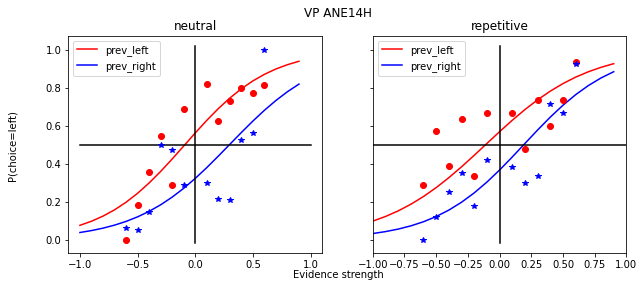

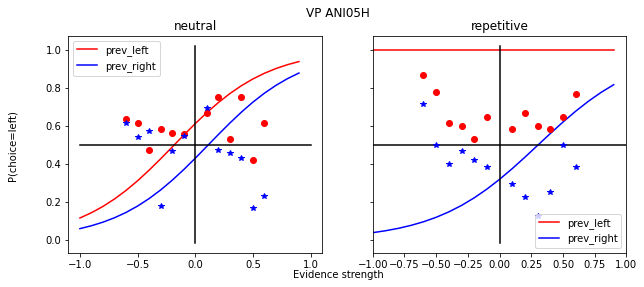

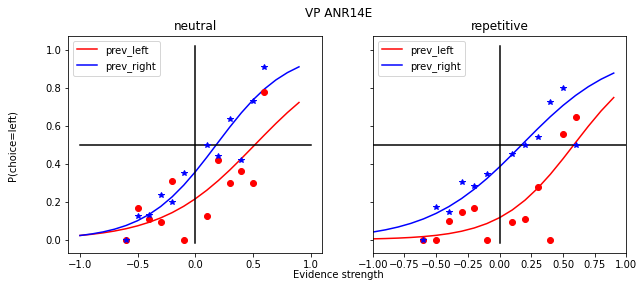

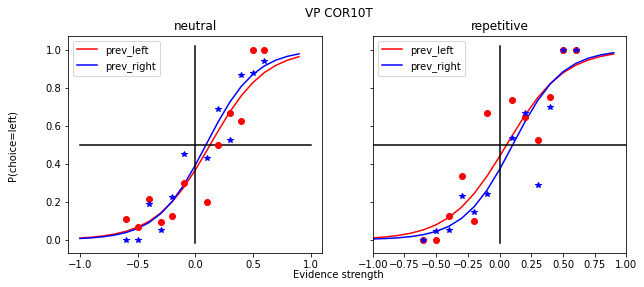

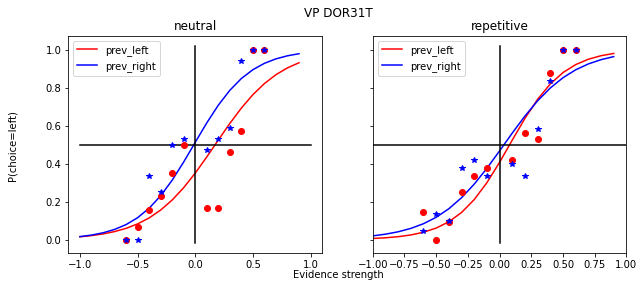

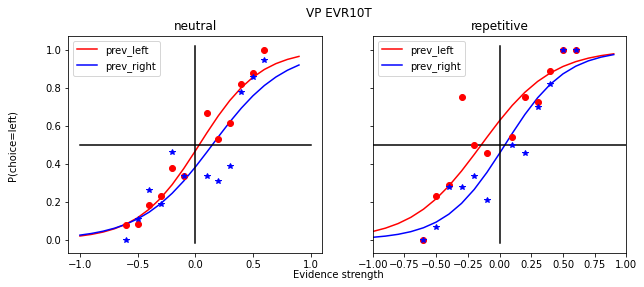

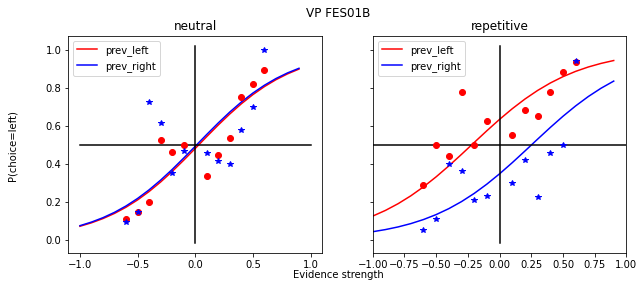

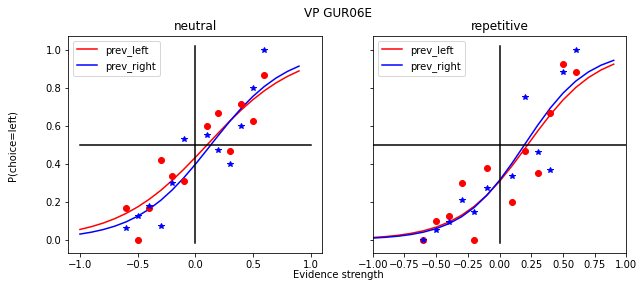

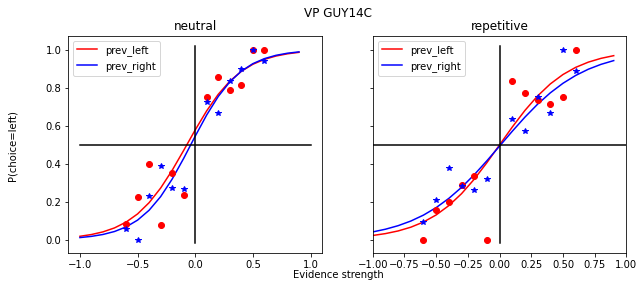

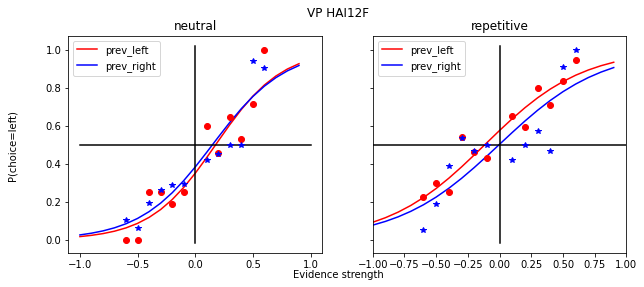

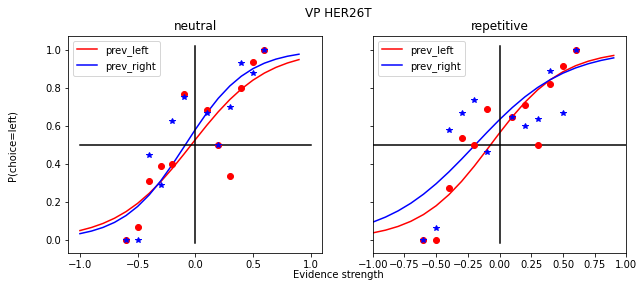

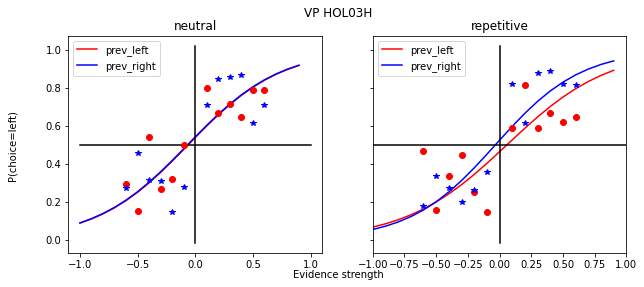

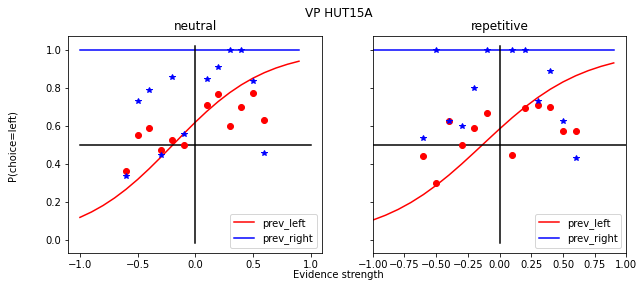

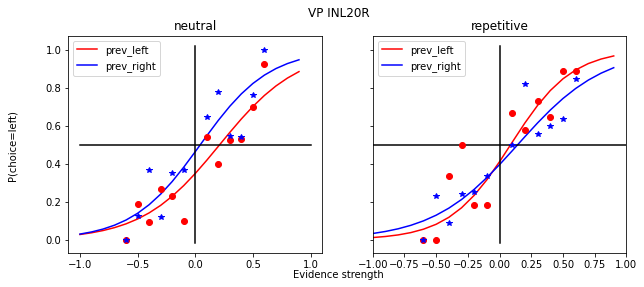

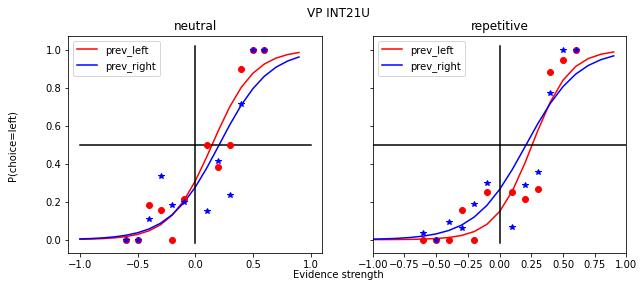

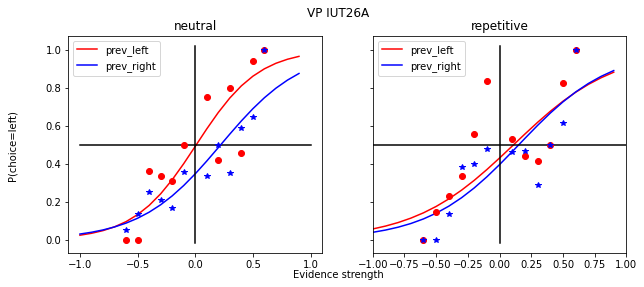

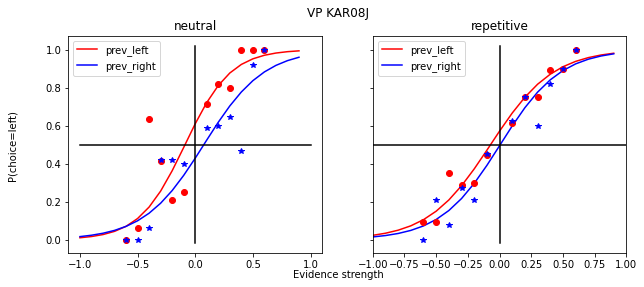

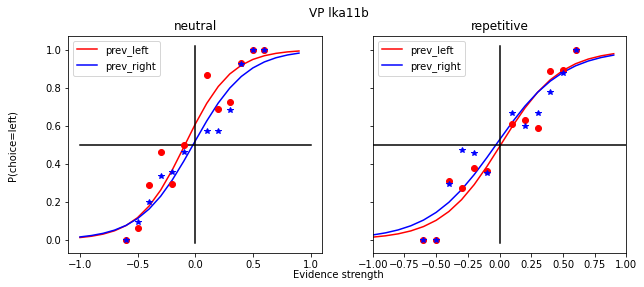

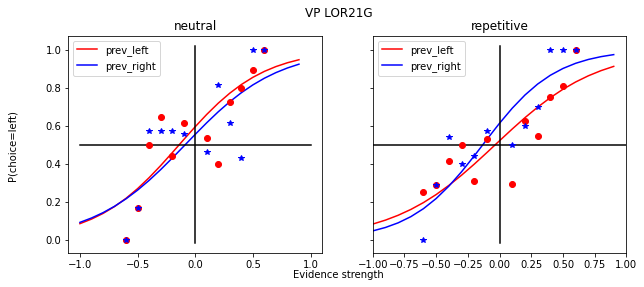

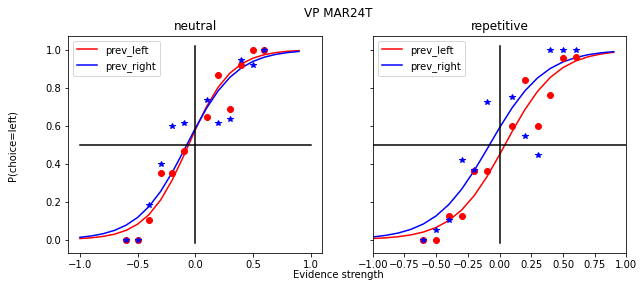

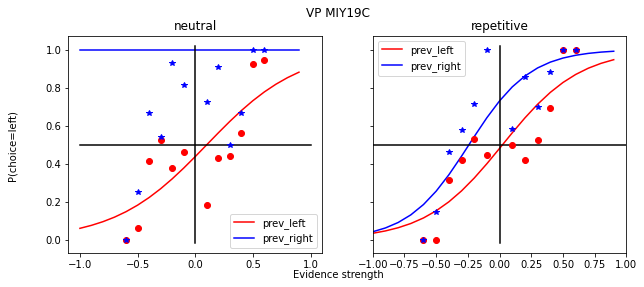

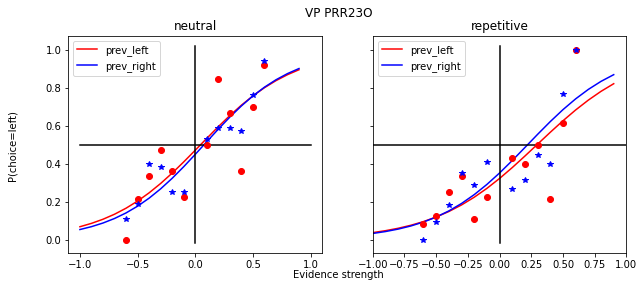

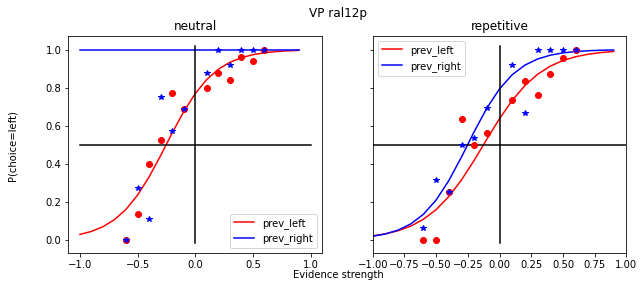

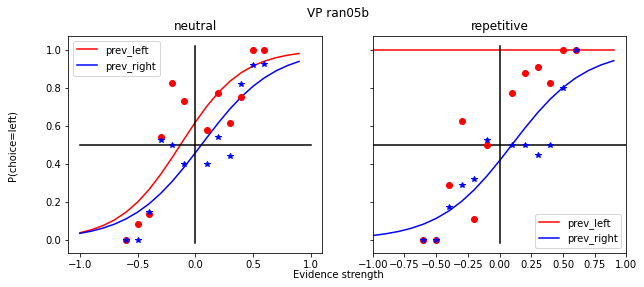

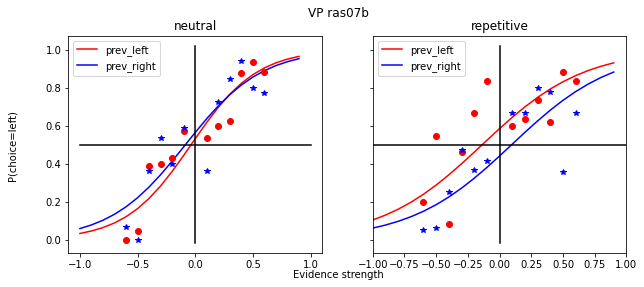

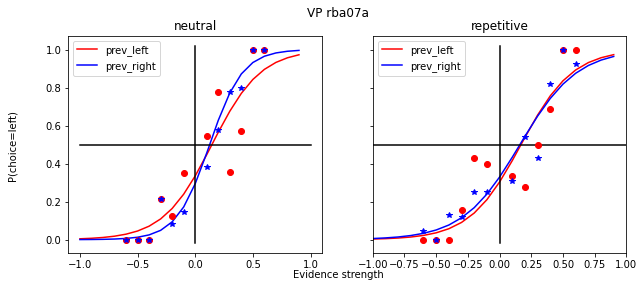

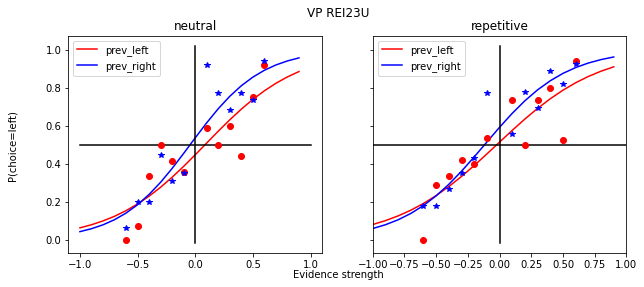

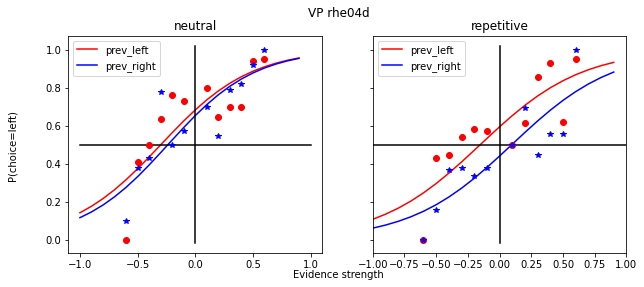

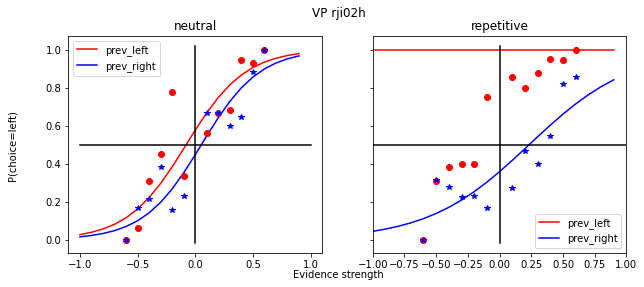

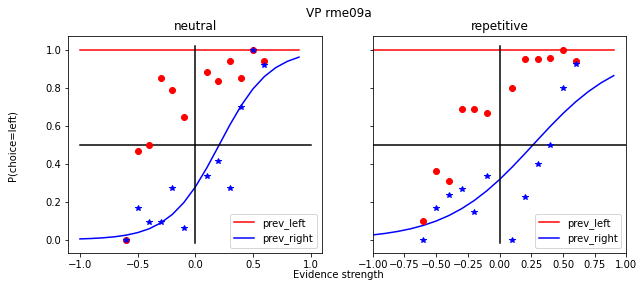

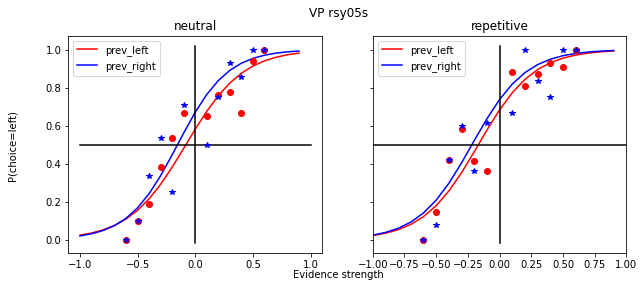

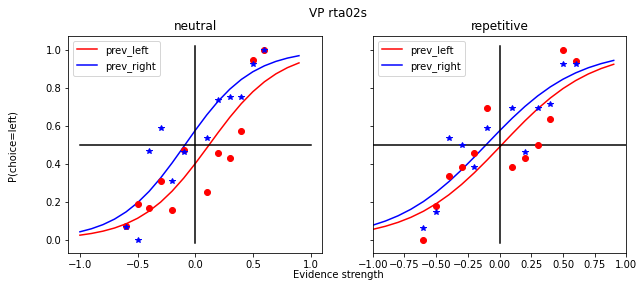

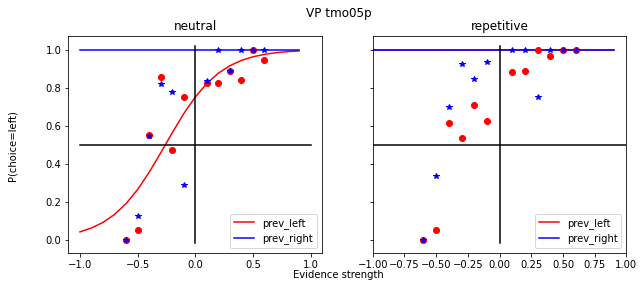

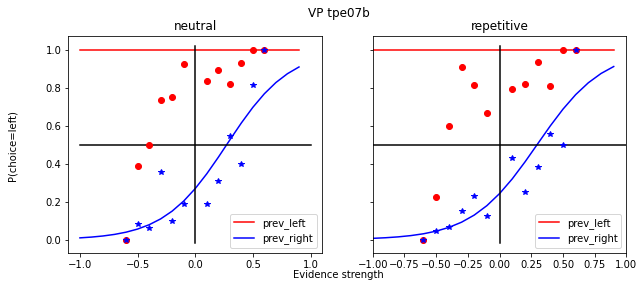

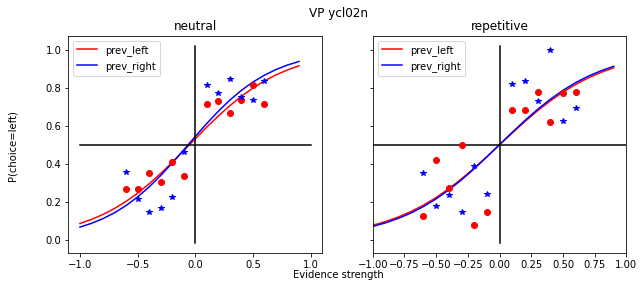

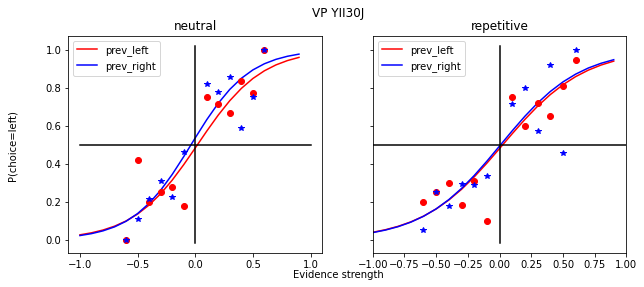

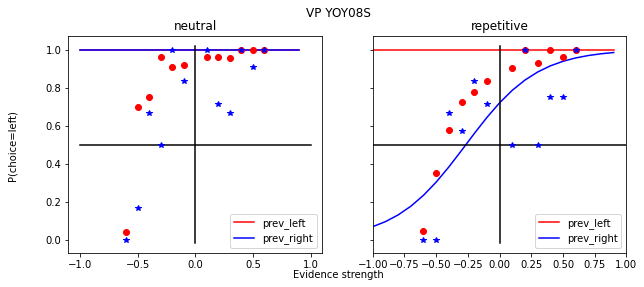

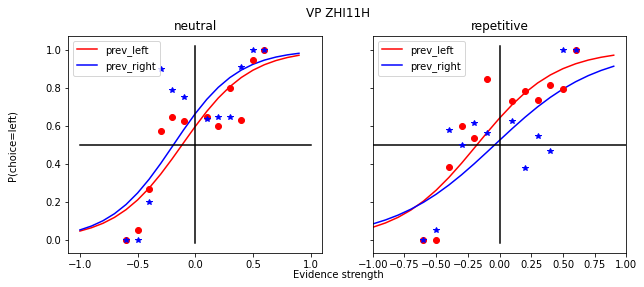

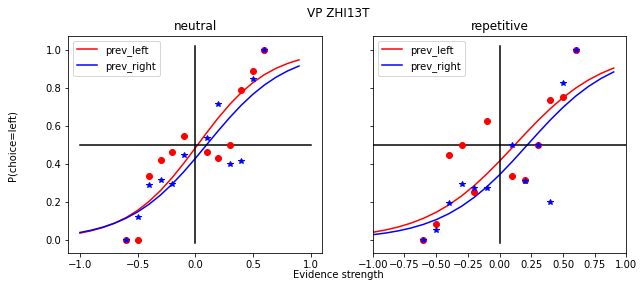

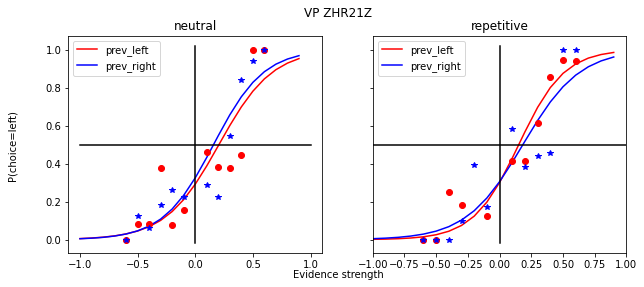

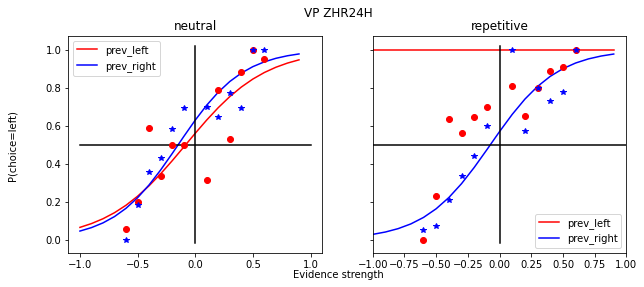

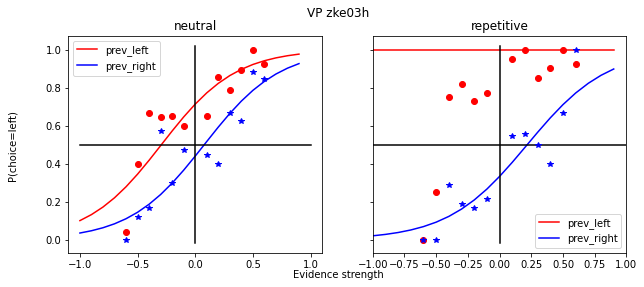

In [5]:
# define datafile with all needed result info
columns = ['sbj_id','bias_reri','bias_rele','noise_rele','noise_reri',
           'bias_neri','bias_nele','noise_neri','noise_nele']
df_res = pd.DataFrame(columns=columns)
nblocks=8
nhist=7

subjects = list(df['sbj_id'].unique())

# iterate over files...
for sbj_id in subjects: 
    df_sbj = df[df['sbj_id']==sbj_id]
    
    # separate repetitive and neutral blocks
    df_neut = df_sbj[df_sbj['block_type']==1] #neutral
    df_rep = df_sbj[df_sbj['block_type']==0] #repetitive
    
    # reset indices
    df_neut = df_neut.reset_index(drop=True)
    df_rep = df_rep.reset_index(drop=True)
    
    # get prev_left and prev_right for each condition
    neut_left = df_neut[df_neut['resp_1']==1]
    neut_right = df_neut[df_neut['resp_1']==0]
    
    rep_left = df_rep[df_rep['resp_1']==1]
    rep_right = df_rep[df_rep['resp_1']==0]
    
    # get choices and stimuli for plotting of data frequencies
    # choices and stimuli in the neutral blocks
    choices_l_n = neut_left.loc[:, 'response'].values   
    stimuli_l_n = neut_left.loc[:, 'coherence'].values
    choices_r_n = neut_right.loc[:, 'response'].values
    stimuli_r_n = neut_right.loc[:, 'coherence'].values

    # chocies and stimuli in repetitive blocks
    choices_l_r = rep_left.loc[:, 'response'].values
    stimuli_l_r = rep_left.loc[:, 'coherence'].values
    choices_r_r = rep_right.loc[:, 'response'].values
    stimuli_r_r = rep_right.loc[:, 'coherence'].values
        
    # repetitive_right = reri, repetitive_left = rele, neutral_right = neri, neutral_left = nele
    bias_reri, noise_reri = fit_PMF(rep_right)
    bias_rele, noise_rele = fit_PMF(rep_left)

    bias_neri, noise_neri = fit_PMF(neut_right)
    bias_nele, noise_nele = fit_PMF(neut_left)
    
    
    case = {'sbj_id':sbj_id,'bias_reri':bias_reri,'bias_rele':bias_rele,'noise_rele':noise_rele,
            'noise_reri':noise_reri,'bias_neri':bias_neri,'bias_nele':bias_nele,
            'noise_neri':noise_neri,'noise_nele':noise_nele}
    
    df_res = df_res.append(case,ignore_index=True)
    
    fig, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4))

    plot_PMF(bias_nele, noise_nele, bias_neri, noise_neri, ax1, sbj_id, choices_l_n, stimuli_l_n, choices_r_n, stimuli_r_n)
    ax1.title.set_text('neutral')
    plot_PMF(bias_rele, noise_rele, bias_reri, noise_reri, ax2, sbj_id, choices_l_r, stimuli_l_r, choices_r_r, stimuli_r_r)
    ax2.title.set_text('repetitive')
    _ = fig.text(0.5,0.04, 'Evidence strength' , ha='center')
    _ = fig.text(0.04, 0.5, 'P(choice=left)', va='center',rotation='vertical')
    

# T-test on visual PMF fits

In [6]:
# t-test biases previous left vs. previous right, repetitive condition
ttest_rel(df_res.groupby('sbj_id').bias_reri.mean(), df_res.groupby('sbj_id').bias_rele.mean())

Ttest_relResult(statistic=2.5002693574067134, pvalue=0.016501853084067746)

In [7]:
# test biases of previous left vs. previous right response in neutral condition
ttest_rel(df_res.groupby('sbj_id').bias_neri.mean(), df_res.groupby('sbj_id').bias_nele.mean())

Ttest_relResult(statistic=-0.7405265497566644, pvalue=0.463200544138505)

In [8]:
# make array with zeros per subject for t-test against zero
idx = df_res.groupby('sbj_id').bias_reri.mean().index
val = np.zeros(len(idx))
zeros = pd.Series(val, idx)

In [9]:
# test bias of previous left response in repetitive condition
ttest_rel(df_res.groupby('sbj_id').bias_rele.mean(), zeros)

Ttest_relResult(statistic=-3.3109732448024136, pvalue=0.001946211619707514)

In [10]:
# test bias of previous left response in neutral condition
ttest_rel(df_res.groupby('sbj_id').bias_nele.mean(), zeros)

Ttest_relResult(statistic=-1.795800093140108, pvalue=0.07989851045039179)

In [11]:
# test of bias of previous right response in repetitive condition
ttest_rel(df_res.groupby('sbj_id').bias_reri.mean(), zeros)

Ttest_relResult(statistic=-1.2665707995493123, pvalue=0.21245725582391745)

In [12]:
# test of bias of previous left response in neutral condition
ttest_rel(df_res.groupby('sbj_id').bias_neri.mean(), zeros)

Ttest_relResult(statistic=-2.2766868601215102, pvalue=0.02809332832298757)

# ANOVA

In [15]:
df_anova = pd.DataFrame(columns=['sbj_id', 'bias', 'prev', 'block'])
biases = ['bias_reri', 'bias_rele', 'bias_neri', 'bias_nele']

for index, row in df_res.iterrows(): 
    
    sbj = row['sbj_id']
    
    for b in biases: 
        
        bias = row[b]
        
        if b == 'bias_reri': 
            prev = 0
            block = 0
            df_anova = df_anova.append({'sbj_id':sbj, 'bias': bias, 'prev':prev, 'block':block}, ignore_index=True)
            
        elif b == 'bias_rele': 
            prev = 1
            block = 0
            df_anova = df_anova.append({'sbj_id':sbj, 'bias': bias, 'prev':prev, 'block':block}, ignore_index=True)
        elif b == 'bias_neri': 
            prev = 0
            block = 1
            df_anova = df_anova.append({'sbj_id':sbj, 'bias': bias, 'prev':prev, 'block':block}, ignore_index=True)
        elif b == 'bias_nele': 
            prev = 1
            block = 1
            df_anova = df_anova.append({'sbj_id':sbj, 'bias': bias, 'prev':prev, 'block':block}, ignore_index=True)

            
#ANOVA 
pg.rm_anova(dv='bias', within=['block', 'prev'], subject='sbj_id', data=df_anova)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,block,4.746041,1,41,4.746041,0.931495,0.340133,0.340133,0.022215,1.0
1,prev,16.904560,1,41,16.904560,1.324366,0.256478,0.256478,0.031291,1.0
2,block * prev,47.923447,1,41,47.923447,11.466745,0.001573,0.001573,0.218553,1.0


In [16]:
df_anova

,sbj_id,bias,prev,block
0,ANE14H,0.191692,0,0
1,ANE14H,-0.109495,1,0
2,ANE14H,0.297824,0,1
3,ANE14H,-0.089018,1,1
4,ANI05H,0.306455,0,0
5,ANI05H,-10.000000,1,0
6,ANI05H,0.115797,0,1
7,ANI05H,-0.179324,1,1
8,ANR14E,0.176333,0,0
9,ANR14E,0.586791,1,0
